### Jupyter notebook contains a solutions from Chapter V — Resampling Methods from the book "Introduction To Statistical Learning" in a Python edition written by Daniela Witten, Trevor Hastie, Robert Tibshirani, Gareth James and Jonathan Taylor.

# Table Of Contents

* [Exercise 5.4.5 (a)](#Exercise-5.4.5-a)
* [Exercise 5.4.5 (b)](#Exercise-5.4.5-b)
* [Exercise 5.4.5 (c)](#Exercise-5.4.5-c)
* [Exercise 5.4.5 (d)](#Exercise-5.4.5-d)
* [Exercise 5.4.6 (a)](#Exercise-5.4.6-a)
* [Exercise 5.4.6 (b)](#Exercise-5.4.6-b)
* [Exercise 5.4.6 (c)](#Exercise-5.4.6-c)
* [Exercise 5.4.6 (d)](#Exercise-5.4.6-d)
* [Exercise 5.4.7 (a)](#Exercise-5.4.7-a)
* [Exercise 5.4.7 (b)](#Exercise-5.4.7-b)
* [Exercise 5.4.7 (c)](#Exercise-5.4.7-c)
* [Exercise 5.4.7 (d)](#Exercise-5.4.7-d)
* [Exercise 5.4.7 (e)](#Exercise-5.4.7-e)
* [Exercise 5.4.8 (a)](#Exercise-5.4.8-a)
* [Exercise 5.4.8 (b)](#Exercise-5.4.8-b)
* [Exercise 5.4.8 (c)](#Exercise-5.4.8-c)
* [Exercise 5.4.8 (d)](#Exercise-5.4.8-d)
* [Exercise 5.4.8 (e)](#Exercise-5.4.8-e)
* [Exercise 5.4.8 (f)](#Exercise-5.4.8-f)
* [Exercise 5.4.9 (a)](#Exercise-5.4.9-a)
* [Exercise 5.4.9 (b)](#Exercise-5.4.9-b)
* [Exercise 5.4.9 (c)](#Exercise-5.4.9-c)
* [Exercise 5.4.9 (d)](#Exercise-5.4.9-d)
* [Exercise 5.4.9 (e)](#Exercise-5.4.9-e)
* [Exercise 5.4.9 (f)](#Exercise-5.4.9-f)
* [Exercise 5.4.9 (g)](#Exercise-5.4.9-g)
* [Exercise 5.4.9 (h)](#Exercise-5.4.9-h)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from collections import defaultdict
from functools import partial

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP.models import sklearn_sm

from sklearn.model_selection import cross_validate, KFold, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.utils import check_random_state
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut


### Exercise 5.4.5

In chapter 4, we used logistic regression to predict the probability of `default` using `income` and balance on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to et a random seed before beginning your analysis.

### Exercise 5.4.5 a

Fit a logisitc regression model that uses `income` and `balance` to predict `default`.

In [2]:
default_data = load_data('Default')

In [3]:
terms = MS(['income', 'balance'])
X_train = terms.fit_transform(default_data)
y_train = np.where(default_data['default'] == 'Yes', 1, 0)

lr_estimator = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = lr_estimator.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Mon, 23 Oct 2023   Deviance:                       1579.0
Time:                        13:23:51   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================
"""

### Exercise 5.4.5 b

Using the validation approach, estimate the test error of this model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

ii. Fit a multiple logistic regression model using only the training observations.

iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of `default` for that individual, and classifying the individual to
the default category if the posterior probability is greater than 0.5.

iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [4]:
Default_train, Default_valid = train_test_split(default_data, test_size=len(default_data) // 2, random_state=0, shuffle=True)

In [5]:
X_train = terms.fit_transform(Default_train)
y_train = np.where(Default_train['default'] == 'Yes', 1, 0)

X_valid = terms.transform(Default_valid)
y_valid = np.where(Default_valid['default'] == 'Yes', 1, 0)

lr_estimator_va = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = lr_estimator_va.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -364.78
Date:                Mon, 23 Oct 2023   Deviance:                       729.56
Time:                        13:23:51   Pearson chi2:                 2.57e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1125
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.3896      0.635    -17.935      0.000     -12.634     -10.145
income       1.58e-05   7.34e-06      2.151      0.031     1.4e-06    3.02e-05
balance        0.0056      0.000     16.792      0.000       0.005       0.006
==============================================================================
"""

In [6]:
valid_preds = results.predict(X_valid)
valid_labels = np.array(valid_preds >= 0.5).astype(int)

In [7]:
valid_test_error = np.mean(y_valid != valid_labels)

valid_test_error

0.029

### Exercise 5.4.5 c

Repeat [(b)](#exercise-5.4.5-b) three times, using three different splits of the observations into a training set and validation set. Comment on the results obtained.

__Answer__:

* while splitting the data set into train and validation with ratio 0.5 to 0.5 (50\% train and 50\% valid) in the test error we don't see very much high variance among the test errors with random seed,
* the test error generally is not high, since in the single split we got $0.029$ and then performing three times validation approach we don't see much higher test errors,
* we see that `income` and `balance` is sufficient enough to predict the `default`.

In [8]:
def evalTestError(data, predictors, dependent_variable, model, n_splits):

    import random

    test_errors = np.zeros(n_splits)

    for idx in range(n_splits):
        seed = random.randint(1, 1000)
        Default_train, Default_valid = train_test_split(data, test_size=len(data) // 2, random_state=seed)
    
        terms = MS(predictors)
    
        X_train = terms.fit_transform(Default_train)
        y_train = np.array(Default_train.loc[:, dependent_variable] == 'Yes').astype(int)
    
        X_valid = terms.transform(Default_valid)
        y_valid = np.array(Default_valid.loc[:, dependent_variable] == 'Yes').astype(int)
    
        lr_estim = model(y_train, X_train.astype(float))
        results = lr_estim.fit()

        y_preds = results.predict(X_valid.astype(float))
        y_labels = np.where(y_preds >= 0.5, 1, 0)

        test_errors[idx] = np.mean(y_labels != y_valid)

    return test_errors


In [9]:
lr_test_errors = evalTestError(
        default_data,
        ['income', 'balance'],
        'default',
        partial(sm.GLM, family=sm.families.Binomial()),
        n_splits=5
    )

print(lr_test_errors)
np.mean(lr_test_errors), np.std(lr_test_errors)

[0.0264 0.0272 0.0262 0.0276 0.0254]


(0.02656, 0.0007735631842325485)

### Exercise 5.4.5 d

Now consider a logistic regression model that predicts the probability of `default` using `income`, `balance` and a dummy variable `student`. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

__Answer__:

* based on the validation approach test error estimates, including dummy variable `student` leads to worse test error rate predictions. This can be caused by multicollinearity of the dummy variable with the rest of predictors, i.e. `balance` and `income`,
* the $p$-value of $t$-test for comparing whether there is no a significant level of improving the model performance ($H_0$) between the alternative hypothesis ($H_a$) that indeed, there is a significant improvement in performance in statistical method;
* the $p$-value is grater than $0.05$, so it's strong evidence to reject $H_0$ in the favor of $H_a$: there is a significant improvement in the model.

In [10]:
dummy_default_data = pd.get_dummies(default_data, columns=['student'])

In [11]:
default_data_train, default_data_valid = train_test_split(dummy_default_data, test_size=len(dummy_default_data) // 2, random_state=0)

In [12]:
terms = MS(['balance', 'income', 'student_Yes'])

X_train = terms.fit_transform(default_data_train)
y_train = np.where(default_data_train.loc[:, 'default'] == 'Yes', 1, 0)

X_valid = terms.transform(default_data_valid)
y_valid = np.where(default_data_valid.loc[:, 'default'] == 'Yes', 1, 0)

lr_estim = sm.GLM(y_train, X_train.astype(float), family=sm.families.Binomial())

results = lr_estim.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4996
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -361.47
Date:                Mon, 23 Oct 2023   Deviance:                       722.93
Time:                        13:23:52   Pearson chi2:                 2.58e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1137
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept     -10.4955      0.710    -14.777      0.000     -11.888      -9.103
balance         0.0057      0.000     16.740      0.000       0.005       0.006
income      -8.831e-06   1.21e-05     -0.732      0.464   -3.25e-05    1.48e-05
student_Yes    -0.8918      0.344     -2.591      0.010      -1.567      -0.217
===============================================================================
"""

In [13]:
y_preds = results.predict(X_valid.astype(float))
y_labels = np.where(y_preds >= 0.5, 1, 0)
test_error = np.mean(y_labels != y_valid)
test_error

0.0292

In [14]:
lr_dummy_test_errors = evalTestError(
    dummy_default_data,
    ['balance', 'income', 'student_Yes'],
    'default',
    partial(sm.GLM, family=sm.families.Binomial()),
    n_splits=5
)

print(lr_dummy_test_errors)
lr_dummy_test_errors.mean(), lr_dummy_test_errors.std()


[0.0264 0.0266 0.0256 0.0288 0.0252]


(0.02652, 0.0012496399481450643)

### Paired T-Test to estimate whether `student` improves model accuracy or not

In [15]:
from scipy import stats

t_statistic, p_value = stats.ttest_rel(lr_test_errors, lr_dummy_test_errors)


In [16]:
t_statistic, p_value

(0.12082441866603472, 0.9096562371156087)

### Exercise 5.4.6

We continue to consider the use of logistic regression model to predict the probability of `default` using `income` and `balance` on the `Default` data set. In particular, we will now compute estimates for the standard errors of the `income` and `balance` logisitc regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the `sm.GLM()` function. Do not forget to set a random seed before beginning your analysis.

### Exercise 5.4.6 a

Using the `summarize()` and `sm.GLM()` functions, determine the estimated standard errors for the coefficients associated with `income` and `balance` in a multiple logistic regression model that uses both predictors.


In [17]:
seed_value = 0
np.random.seed(seed_value)
random.seed(seed_value)
rng = check_random_state(seed_value)

In [18]:
X_design = MS(['income', 'balance'])
X_train = X_design.fit_transform(default_data)
y_train = np.where(default_data.loc[:, 'default'] == "Yes", 1, 0)
lr_estim = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = lr_estim.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Mon, 23 Oct 2023   Deviance:                       1579.0
Time:                        13:23:52   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================
"""

In [19]:
results._results.bse

array([4.34772469e-01, 4.98524546e-06, 2.27381384e-04])

### Exercise 5.4.6 b

Write a function, `boot_fn()`, that takes as an input the `Default` data set as well as an index of observations, and that outputs the coefficient estimates for `income` and `balance` in the multiple logistic regression.

In [20]:
def boot_fn(model_matrix, response, data, index):
    X_ = data.iloc[index]
    Y_ = np.where(X_.loc[:, response] == 'Yes', 1, 0)
    X_ = clone(model_matrix).fit_transform(X_)
    return sm.GLM(Y_, X_, family=sm.families.Binomial()).fit().params


In [21]:
boot_fn(MS(['income', 'balance']), 'default', default_data, np.arange(0, default_data.shape[0]))

intercept   -11.540468
income        0.000021
balance       0.005647
dtype: float64

### Exercise 5.4.6 c

Following the bootstrap example in the lab, use your `boot_fn()` function to estimate the standard erros for the logistic regression coefficients for `income` and `balance`.

In [22]:
def boot_SE_logistic(func, D, n=None, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    coef_samples = []
    n = n or D.shape[0]
    for _ in range(B):
        idx = rng.choice(D.index, n, replace=True)
        coef = func(D, idx)
        coef_samples.append(coef)
    return np.std(coef_samples, axis=0), coef_samples


In [23]:
boot_fn_logistic = partial(boot_fn, MS(['income', 'balance']), 'default')

In [24]:
SE_betas, coeff_samples = boot_SE_logistic(boot_fn_logistic, default_data, B=1000, seed=seed_value)

In [25]:
SE_betas

array([4.35692097e-01, 4.76719975e-06, 2.30435343e-04])

In [26]:
np.mean(coeff_samples, axis=0)

array([-1.15651058e+01,  2.06448004e-05,  5.66167804e-03])

### Exercise 5.4.6 d

Comment on the estimated standard errors obtained using the `sm.GLM()` function and using the bootstrap.

__Answer__:
* the `sm.GLM()` method produces following estimates for $\beta$ coefficients:
    * $\hat{SE}(\beta_0) = 0.435$, $\hat{\beta_0} = -11.5405$;
    * $\hat{SE}(\beta_1) = 0.00000499$, $\hat{\beta_1} = 0.00002081$;
    * $\hat{SE}(\beta_2) = 0.000$, $\hat{\beta_2} = 0.0056$ 
* the bootstrap method, produces following estimates for $\beta$ coefficients:
    * $\hat{SE}(\beta_0) = 0.435692097$, $\hat{\beta_0} = -11.5651058$
    * $\hat{SE}(\beta_1) = 0.00000476719975$, $\hat{\beta_1} = 0.0000206448004$,
    * $\hat{SE}(\beta_2) = 0.000230435343$, $\hat{\beta_2} = 0.00566167804$
 
__Answer__:

The standard errors between `sm.GLM` and bootstrap methods appears to be close and it's well estimated;



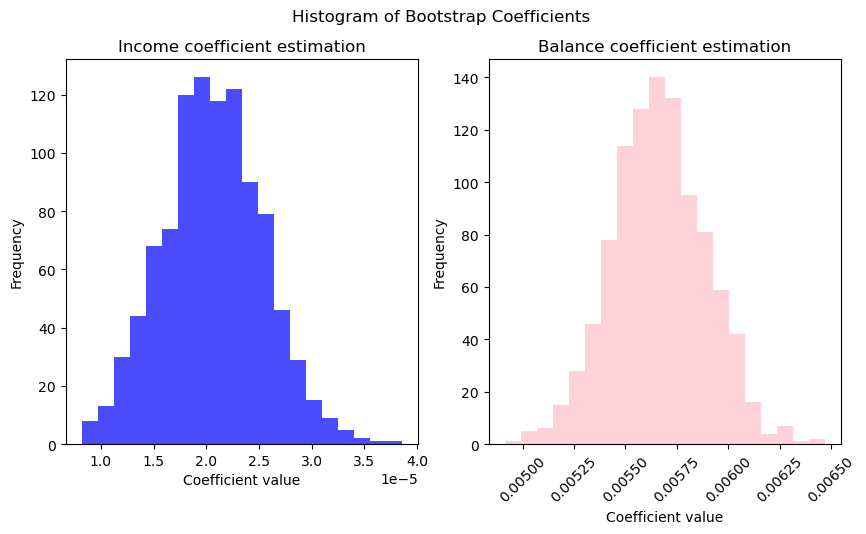

In [27]:
income_coefficients = list(map(lambda coeff: coeff.income, coeff_samples))
balance_coefficients = list(map(lambda coeff: coeff.balance, coeff_samples))
num_bins = 20

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(income_coefficients, bins=num_bins, alpha=0.7, color='blue', label='Income Bootstrap Coefficients')
ax[0].set_title('Income coefficient estimation')
ax[1].hist(balance_coefficients, bins=num_bins, alpha=0.7, color='pink', label='Balance Bootstrap Coefficients')
ax[1].set_title('Balance coefficient estimation')

for ax_ in [row for row in ax]:
    ax_.set_xlabel('Coefficient value')
    ax_.set_ylabel('Frequency')

plt.sca(ax[1])
plt.xticks(rotation=45)

plt.suptitle('Histogram of Bootstrap Coefficients')
plt.show()

### Exercise 5.4.7

We saw, that the `cross_validate()` function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just `sm.GLM()` and the `predict()` method of the fitted model within a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the `Weekly` data set. Recall that in the context of classification problems, the LOOCV error is given:

$$
\text{CV}_{(n)} = \frac{1}{n} \sum_{i=1}^{n}Err_i
$$

Where:

* $Err_i = I(y_i \neq \hat{y}_i)$

In [28]:
weekly_data = load_data('Weekly')

### Exercise 5.4.7 a

Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2`.

In [29]:
X_design = MS(['Lag1', 'Lag2'])
X_train = X_design.fit_transform(weekly_data)
y_train = np.array(weekly_data.loc[:, 'Direction'] == 'Up').astype(int)
lr_estim = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results  = lr_estim.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1086
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -744.11
Date:                Mon, 23 Oct 2023   Deviance:                       1488.2
Time:                        13:24:50   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007303
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

### Exercise 5.4.7 b

Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2` *using all but the first observation*.

In [30]:
X_train_omit_fo = X_design.fit_transform(weekly_data.iloc[1:])
y_train_omit_fo = np.array(weekly_data.iloc[1:, -1] == 'Up').astype(int)
lr_estim_fo = sm.GLM(y_train_omit_fo, X_train_omit_fo, family=sm.families.Binomial())
results = lr_estim_fo.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1088
Model:                            GLM   Df Residuals:                     1085
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.26
Date:                Mon, 23 Oct 2023   Deviance:                       1486.5
Time:                        13:24:50   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007373
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
Lag2           0.0608      0.027      2.291      0.022       0.009       0.113
==============================================================================
"""

### Exercise 5.4.7 c

Use the model from [(b)](#Exercise-5.4.7-b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if $P(\text{direction} = \text{"Up"} \mid \text{Lag1, Lag2}) > 0.5$. Was the observation correctly classified?

__Answer__:

The observation has been missclassified.

In [31]:
first_obs_X = weekly_data.iloc[0, [1, 2]]
first_obs_X['intercept'] = 1
first_obs_y = weekly_data.iloc[0, -1]
y_pred_fo = results.predict(first_obs_X.astype(float))

In [32]:
y_pred_fo

None    0.545523
dtype: float64

In [33]:
y_label = np.where(y_pred_fo >= 0.5, 'Up', 'Down')

y_label == first_obs_y

array([False])

### Exercise 5.4.7 d

Write a $for$ loop from $i = 1$ to $i = n$, where $n$ is the number of observations in the data set, that performs each of the following steps:
* fit a logistic regression model using all but the $i$-th observation to predict `Direction` using `Lag1` and `Lag2`.
* compute the posterior probability of the market moving for the $i$th observation,
* use the posterior probability for the $i$th observation in order to predict whether or not the market moves up,
* determine whether or not an error was made in predicting the direction for the $i$th observation. If an error was made, then indicate this as a $1$, and the otherwise indicate it as $0$.

In [34]:
n = weekly_data.shape[0]
indicator_errors = []
for idx in range(n):
    subset_data = weekly_data.drop(idx)
    test_data = weekly_data.iloc[idx]
    X_train = X_design.fit_transform(subset_data)
    y_train = np.where(subset_data.loc[:, 'Direction'] == 'Up', 1, 0)
    model = sm.GLM(y_train, X_train).fit()
    X_test = test_data.iloc[[1, 2]]
    y_test = test_data.iloc[-1]
    X_test['intercept'] = 1
    y_pred = model.predict(X_test.astype(float))
    y_label = np.where(y_pred >= 0.5, 'Up', 'Down')
    indicator_errors.append(int(y_label == y_test))

### Exercise 5.4.7 e

Take the average of the $n$ numbers obtained in (d)iv in order to obtain the $\text{LOOCV}$ estimate for the test error. Comment on the results.

__Answer__:
* the error is around $0.44$, so the logistic regression performs on average a little bit better than a chance,
* using LOOCV, we decrease the bias error, however variance might be still high, so in this case the single observation as a test sample might influence the error rate in the prediction.

In [35]:
avg_test_error = sum(indicator_errors) / len(indicator_errors)
avg_test_error

0.44536271808999084

### Exercise 5.4.8

We will now perform corss-validation on a simulated data set.

### Exercise 5.4.8 a

Generate a simulated data set as follows:

```python
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size = 100)
```
In this data set, what is $n$ and what is $p$. Write out the model used to generate the data in equation form.

__Answer__:

Wee see that:
$$
Y = f(X) + \epsilon = X - 2X^{2} + \epsilon
$$

Where:
* $X \sim \mathcal{N}(\mu=0, \sigma^{2}=1)$, $X \in \mathbb{R}^{100 \times 1}$,
* $\epsilon \sim \mathcal{N}(\mu=0, \sigma^{2}=1)$, $\epsilon$ stands for irreducible error which comes from Gaussian distribution.

In this case $n = 100$, we get $100$ observations of predictors as well as dependent variable.
$p = 1$, since we only have single predictor.

In [36]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size = 100)

### Exercise 5.4.8 b

Create a scatterplot of $X$ against $Y$. Comment on what you find.

__Answer__:

Scatterplot represents the relation between $X$ and $Y$.

As we can see from that plot, the relationship is highly non-linear (quadratic), because we see asymptotic pattern among the observations.

We see that, on both negative values, there exists postive relationship (negative values along $X$ increase as well as negative values of $y$).

Around $X=0$ the tendency seems to be opposite; larger values of $X$ have smaller values of $y$.

We see that the scatterplot, reminds the Gaussian Distribution from which $X$ predictor has been drawn.


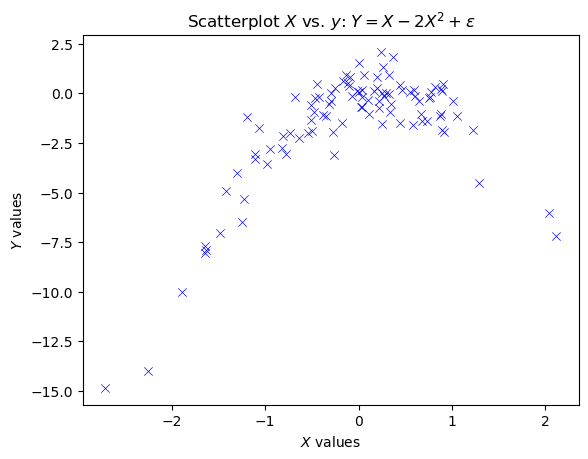

In [37]:
sns.scatterplot(x=x, y=y, marker='x', color='blue', legend='auto')
plt.title('Scatterplot $X$ vs. $y$: $Y = X - 2X^{2} + \epsilon$')
plt.xlabel('$X$ values')
plt.ylabel('$Y$ values')
plt.show();

### Exercise 5.4.8 c

Set a random seed, and then compute the $\text{LOOCV}$ errors that result from fitting the following four models using least squares:

i. $Y = \beta_0 + \beta_1X + \epsilon$,

ii. $Y = \beta_0 + \beta_1X + \beta_2X^{2} + \epsilon$,

iii. $Y = \beta_0 + \beta_1X + \beta_2X^{2} + \beta_3X^{3} + \epsilon$,

iv. $Y = \beta_0  + \beta_1X + \beta_2X^{2} + \beta_3X^{3} + \beta_4X^{4} + \epsilon$.

In [38]:

seed_value = 0

def loocv_perform(estimator, degree, X, y, reduction, seed=0):

    degrees = list(range(1, degree + 1))
    models = [estimator] * degree
    model_parameters = []
    
    np.random.seed(seed)
    rng = check_random_state(seed)
    
    loo = LeaveOneOut()
    errors = defaultdict(list)
    power_columns = []
    
    for i in range(1, max(degrees) + 1):
        power_columns.append(np.power(X, i))
    
    for degree in degrees:
        power_columns_index = [degree - 1 for degree in degrees[:degree]]
        
        X = np.column_stack([power_columns[idx] for idx in power_columns_index])
        y = np.array(y)
        
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model_index = degree - 1
            model = models[model_index]
            model.name = f'{degree}_linear_regression'
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            error = mean_squared_error(y_test, y_pred)
            errors[model.name].append(error)
            model_parameters.append(np.hstack((model.intercept_, model.coef_)))

    # average all errors
    if reduction == 'mean':
        avg_errors = {}
        for model, err in errors.items():
            avg_error = sum(err) / len(err)
            avg_errors[model] = avg_error
            
        return avg_errors, model_parameters

    return dict(sorted(errors.items())), model_parameters

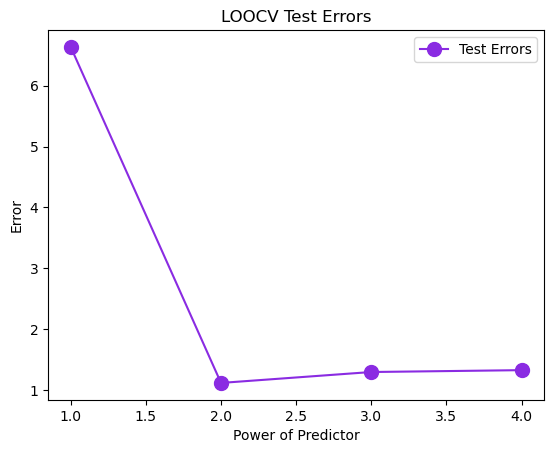

In [39]:
results, _ = loocv_perform(LinearRegression(), degree=4, X=x, y=y, reduction='mean')
X_deg = [int(key.split('_')[0]) for key in results.keys()]
loocv_errors = list(results.values())

plt.plot(X_deg, loocv_errors, marker='o', markersize=10, label='Test Errors', color='#8A2BE2')

plt.title('LOOCV Test Errors')
plt.xlabel('Power of Predictor')
plt.ylabel('Error')

plt.legend()
plt.show();


### Exercise 5.4.8 d

Repeat [(d)](#Exercise-5.4.8-c) using another random seed, and report you results. Are your results the same as what you got in [(c)](#Exercise-5.4.8-c)? Why?

__Answer__:

* with different seed, we get similar results, because we create $n$ models with the same training subsets: $n - 1$ observations are used as training set, whereas $n$ is the validation data set. The process is repeated $n$ times, therefore, on average, we obtain similar errors regardless of the different random seed.

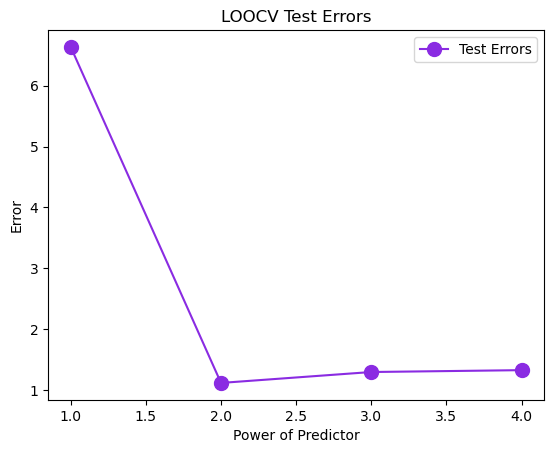

In [40]:
seed_value = 777
loocv_results, model_params = loocv_perform(LinearRegression(), degree=4, X=x, y=y, reduction='mean', seed=seed_value)

X_deg = [int(key.split('_')[0]) for key in loocv_results.keys()]
loocv_errors = list(loocv_results.values())

plt.plot(X_deg, loocv_errors, marker='o', markersize=10, label='Test Errors', color='#8A2BE2')

plt.title('LOOCV Test Errors')
plt.xlabel('Power of Predictor')
plt.ylabel('Error')

plt.legend()
plt.show();


### Exercise 5.4.8 e

Which of the models in [(c)](#Exercise-5.4.8-c) had the smallest $\text{LOOCV}$ error? Is this what you expected? Explain your answer.

__Answer__:

I expected that the model:

$$
Y = \beta_0 + \beta_1X + \beta_2X^{2} + \epsilon
$$

would obtain the lowest LOOCV error. This is because the scatterplot pattern clearly indicated a quadratic relationship between $X$ and $Y$. The quadratic formula effectively captures this relationship.

### Exercise 5.4.8 f

Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in [(c)](#Exercise-5.4.8-c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

__Answer__:

* based on the estimated coefficients values and true population $\beta$ coefficients: $\beta_0 = 0, \beta_1 = 1, \beta_2 = 2$, we see that in the degree of 2, quadratic polynomial regression's coeffs are very close to the true one, however, also polynomials with higher degree fit very well to those generated data. These results from the cross validation agree with the results, as well as the plot of Population Regression Line vs. Least Squares Line,
* based on the $t-test$, we see that in the quadratic regression fit, $\beta_0$ is statistically insignificant,
* higher polynomials (degree=3, degree=4), we se that last coefficients are also statistically insignificant to predict dependent variable ($p$-value greater than 0.05).

In [41]:
models_coefficients = {}

for arr in model_params:
    num_columns = arr.shape[0] - 1
    if num_columns not in models_coefficients:
        models_coefficients[num_columns] = []
    models_coefficients[num_columns].append(arr)

for col in models_coefficients.keys():
    vstack = np.vstack(models_coefficients[col])
    models_coefficients[col] = vstack.mean(axis=0)

models_coefficients

{1: array([-1.46460681,  1.94917191]),
 2: array([-0.07249093,  0.96637717, -2.0051668 ]),
 3: array([-0.05658834,  1.11268326, -2.04810676, -0.06344034]),
 4: array([ 0.09998277,  0.90410734, -2.50243614,  0.03442224,  0.10323634])}

In [42]:
results

{'1_linear_regression': 6.633029839181983,
 '2_linear_regression': 1.1229368563419677,
 '3_linear_regression': 1.3017965489358856,
 '4_linear_regression': 1.3323942694179345}

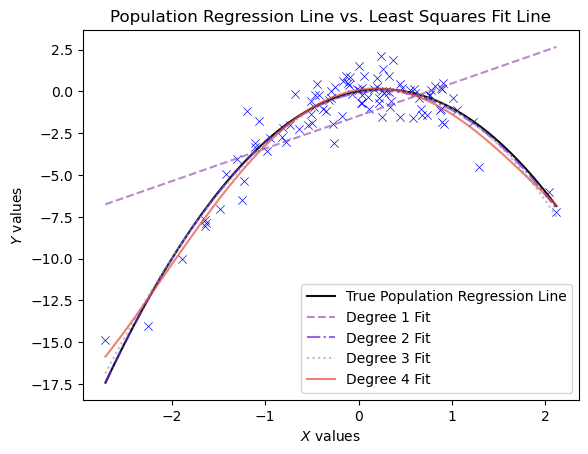

In [43]:
sns.scatterplot(x=x, y=y, marker='x', color='blue', legend='auto')
plt.title('Population Regression Line vs. Least Squares Fit Line')
plt.xlabel('$X$ values')
plt.ylabel('$Y$ values')

x_range = np.linspace(min(x), max(x), 100)
y_true = x_range - 2 * x_range ** 2

plt.plot(x_range, y_true, color='#0b0b0b', label='True Population Regression Line')

line_styles = ['--', '-.', ':', '-']

colors = ['#9b59b6', '#6a24de', '#95a5a6', '#e74c3c']
for degree, coefficients in models_coefficients.items():
    y_fit = np.sum([coefficients[i] * x_range**i for i in range(degree+1)], axis=0)
    plt.plot(x_range, y_fit, label=f'Degree {degree} Fit', color=colors[degree-1], alpha=0.7, linestyle=line_styles[degree-1])

plt.legend()
plt.show()


In [44]:
def calculate_standard_error(X, y, MSE):
    n = X.shape[0]
    k = X.shape[1]
    standard_error = np.sqrt(MSE * np.diag(np.linalg.inv(np.dot(X.T, X))))
    return standard_error

for degree, coef in models_coefficients.items():
    print(f'Degree {degree}:')
    X_degree = np.column_stack([np.power(x, i) for i in range(degree + 1)])
    se = calculate_standard_error(X_degree, y, results[f'{degree}_linear_regression'])
    t_statistic = np.divide(coef, se)
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), len(y) - X_degree.shape[1]))
    
    print(f'Estimated coeffs: {coef}')
    for i, beta in enumerate(coef):
        print(f'Coefficient {i}:')
        print(f'\tEstimated Value: {beta}')
        print(f'\tStandard Error: {se[i]}')
        print(f'\tt-statistic: {t_statistic[i]}')
        print(f'\tp-value: {p_value[i]}')
        print()


Degree 1:
Estimated coeffs: [-1.46460681  1.94917191]
Coefficient 0:
	Estimated Value: -1.464606805247402
	Standard Error: 0.2585071718555296
	t-statistic: -5.665633161102076
	p-value: 1.469964350242492e-07

Coefficient 1:
	Estimated Value: 1.9491719117702095
	Standard Error: 0.30244219978551784
	t-statistic: 6.4447749459318135
	p-value: 4.357360250395459e-09

Degree 2:
Estimated coeffs: [-0.07249093  0.96637717 -2.0051668 ]
Coefficient 0:
	Estimated Value: -0.0724909309765359
	Standard Error: 0.1253790137432142
	t-statistic: -0.5781743595862292
	p-value: 0.5644863125332988

Coefficient 1:
	Estimated Value: 0.9663771702858982
	Standard Error: 0.13297707220577412
	t-statistic: 7.267246558041878
	p-value: 9.341460938117052e-11

Coefficient 2:
	Estimated Value: -2.005166798846129
	Standard Error: 0.09558723744396559
	t-statistic: -20.977348571472024
	p-value: 0.0

Degree 3:
Estimated coeffs: [-0.05658834  1.11268326 -2.04810676 -0.06344034]
Coefficient 0:
	Estimated Value: -0.056588337033

### Exercise 5.4.9

We will now consider the `Boston` housing data set, from the `ISLP` library.


In [45]:
boston_data = load_data('Boston')

boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Exercise 5.4.9 a 

Based on this data set, provide an estimate for the population mean of `medv`. Call this estimate $\hat{\mu}$.

In [46]:
mean_population_estim = boston_data.medv.mean()

mean_population_estim

22.532806324110677

### Exercise 5.4.9 b

Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.

__Answer__:

* This standard error of the mean estimation indicates that on average, if we would draw some more random samples from a population regression line with the same size as `len(boston_data)` and calculate the mean, most of the samples would fall within $\pm40$ units of the true population regression line. 

In [47]:
mean_standard_error = boston_data.medv.std() / np.sqrt(len(boston_data))

mean_standard_error

0.40886114749753505

### Exercise 5.4.9 c

Now estimate the standard error of $\mu$ using the bootstrap. How does this compare to your answer from [(b)](#Exercise-5.4.9-b)?

__Answer__:

Using bootstrap method, we achieve $SE(\hat{\mu}) = 0.40782$.

Using `mean()` on the sample of boston population we have $SE(\hat{\mu}) = 0.4088$

Those standard errors of the estimated mean population are very close to each other.


In [48]:
def boot_mean(data, num_samples):
    n = len(data)
    boostrapped_mean_standard_errors = []

    for _ in range(num_samples):
        sample = np.random.choice(data, n, replace=True)
        estimated_standard_error = sample.std() / np.sqrt(len(sample))
        boostrapped_mean_standard_errors.append(estimated_standard_error)

    return boostrapped_mean_standard_errors
    

In [49]:
num_samples = 10000
bootstrapped_means = boot_mean(boston_data.medv, num_samples)

In [50]:
bootstrapped_means[:10]

[0.4235258616983018,
 0.4170558111058695,
 0.40435859668647905,
 0.4108434529275743,
 0.43643834745623666,
 0.42372142044754657,
 0.413020289800923,
 0.4002264071343133,
 0.42604583779828614,
 0.3945168184084156]

In [51]:
bootstrapped_mean = np.mean(bootstrapped_means)

bootstrapped_mean

0.40774586135528057

### Exercise 5.4.9 d

Based on your bootstrap estimate from [(c)](#Exercise-5.4.9-c), provide a $95\%$ confidence interval for the mean of `medv`. Compare it to the results obtained by using `Boston['medv'].std()` and the two standard error rule:

$$
\hat{\beta_1} \pm 2 \cdot SE(\hat{\beta_1})
$$

*Hint: You can approximate a $95\%$ confidence interval using the formula $[\hat{\mu} - 2SE(\hat{\mu}), \hat{\mu} + 2SE(\hat{\mu})]$*

__Answer__:

* $95\%$ confidence interval for the bootstrap method: $[21.72, 23.35]$,
* $95\%$ confidence interval using `Boston['medv'].std()`: $[21.71, 23.35]$.

The overall confidence interval for both methods are very close to each other and also the $\hat{\mu}$ fits to these confidence intervals.

In [52]:
bootstrap_confidence_interval = [mean_population_estim - 2 * bootstrapped_mean, mean_population_estim + 2 * bootstrapped_mean]

bootstrap_confidence_interval

[21.717314601400115, 23.348298046821238]

In [53]:
mean_population_estim

22.532806324110677

In [54]:
SEM = boston_data.medv.std() / np.sqrt(len(boston_data.medv))
confidence_interval_sems = [mean_population_estim - 2 * SEM, mean_population_estim + 2 * SEM]

In [55]:
confidence_interval_sems

[21.715084029115605, 23.35052861910575]

### Exercise 5.4.9 e

Based on this data set, provide an estimate of $\hat{\mu}_{\text{med}}$, for the median value of `medv` in the population.

In [56]:
population_median_estimate = boston_data.medv.median()

population_median_estimate

21.2

### Exercise 5.4.9 f

We now would like to estimate the standard error of $\hat{\mu}_{\text{med}}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

__Answer__:

* we see that drawing random samples with a fixed length from true population of the `boston` dataset would differ in median of the `medv` by $0.37$ units. 

In [57]:
def boot_median(data, n_samples):
    n = len(data)
    bootstrapped_medians = []
    
    for _ in range(n_samples):
        sample = np.random.choice(data, n, replace=True)
        sample_median_estimate = np.median(sample)
        bootstrapped_medians.append(sample_median_estimate)
    
    return bootstrapped_medians
    

In [58]:
bootstrapped_medians = boot_median(boston_data.medv, 10000)
estimated_bootstrap_median = np.mean(bootstrapped_medians)

In [59]:
estimated_bootstrap_median

21.18492

In [60]:
median_standard_error = np.std(bootstrapped_medians)
median_standard_error

0.3803276135123504

### Exercise 5.4.9 g

Based on this data set, provide an estimate for the tenth percentile of `medv` in Boston census tracts. Call this quantity $\hat{\mu}_{0.1}$. (You can use the `np.percentile` function).

In [61]:
tenth_percentile_medv_estimate = np.percentile(boston_data.medv, 10)

tenth_percentile_medv_estimate

12.75

### Exercise 5.4.9 h

Use the bootstrap to estimate the standard error of $\hat{\mu}_{0.1}$. Comment on your findings.


__Answer__:

* The $\text{SE}(\hat{\mu}_{0.1}) \approx 0.49$ indicates that the samples drawn from population regression line with fixed length (i.e. 10000) might vary by $\pm 0.49$ units which is not very high variation.

In [62]:
def bootstrap_percentile(data, num_samples, percentile):
    n = len(data)
    bootstrapped_percentiles = []

    for _ in range(num_samples):
        sample = np.random.choice(data, n, replace=True)
        bootstrap_percentile = np.percentile(sample, percentile)
        bootstrapped_percentiles.append(bootstrap_percentile)

    return bootstrapped_percentiles


In [63]:
bootstrap_percentiles = bootstrap_percentile(boston_data.medv, 10000, 10)


In [64]:
bootstrap_estimated_tenth_percentile_medv = np.mean(bootstrap_percentiles)
bootstrap_estimated_tenth_percentile_medv

12.761975

In [65]:
bootstrap_standard_error_percentile = np.std(bootstrap_percentiles)
bootstrap_standard_error_percentile

0.502017777947156